In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
def calculate_hours_required(initial_exp, final_exp, exp_per_hour):
    """Calculate the number of hours required to reach final_exp
    
    Args:
        final_exp (int): Final defence experience
        initial_exp (int): Initial defence experience
        exp_per_hour (float): Defence experience per hour
    
    Returns:
        hours_required (float): 
            hours required to reach final_exp, rounded to the nearest hour
    """
    
    exp_required = final_exp - initial_exp
    hours_required = round(exp_required / exp_per_hour, 0)
    return hours_required

In [3]:
exp_data = pd.read_csv('data/processed_experience_data.csv')

In [4]:
X = exp_data['time'].unique()

cumulative_exp = exp_data['cumulative_exp_gained'].to_numpy().reshape(2, -1)
y_rpg, y_scim = cumulative_exp[0, ], cumulative_exp[1, ]

In [5]:
X = sm.add_constant(X)

sm_rpg_regressor = sm.OLS(endog=y_rpg, exog=X)
rpg_results = sm_rpg_regressor.fit()
rpg_summary = rpg_results.summary()

sm_scim_regressor = sm.OLS(endog=y_scim, exog=X)
scim_results = sm_scim_regressor.fit()
scim_summary = scim_results.summary()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
print('Event RPG Regression Results:\n{0}\n'.format(rpg_summary.tables[1]))
print('Iron Scimitar Regression Results:\n{0}'.format(scim_summary.tables[1]))

Event RPG Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8737     12.430     -0.312      0.759     -30.098      22.351
x1            25.3109      0.118    214.541      0.000      25.062      25.560

Iron Scimitar Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3579     10.050      1.827      0.085      -2.845      39.561
x1            21.2533      0.095    222.815      0.000      21.052      21.455


The slopes (x1) along with their confidence intervals suggest that training with the Event RPG results in 25 experience per minute while training with the Iron Scimitar results in 21 experience per minute.

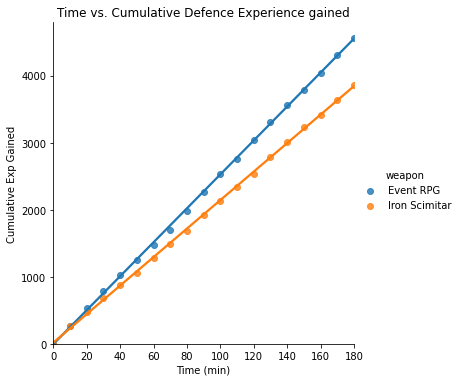

In [7]:
experience_regplot = sns.lmplot(
    x='time', 
    y='cumulative_exp_gained', 
    data=exp_data, 
    hue='weapon'
)
experience_regplot.set(
    title='Time vs. Cumulative Defence Experience gained',
    xlabel='Time (min)',
    ylabel='Cumulative Exp Gained'
)
plt.ylim(0, )
plt.show()

In [8]:
rpg_hourly_exp = round(rpg_results.params[1] * 60, 0)
scim_hourly_exp = round(scim_results.params[1] * 60, 0)

print('Event RPG Exp/Hour:', rpg_hourly_exp)
print('Iron Scimitar Exp/Hour:', scim_hourly_exp)

Event RPG Exp/Hour: 1519.0
Iron Scimitar Exp/Hour: 1275.0


The graph and experience rates suggest that training with the Event RPG results in more experience per hour.

In [9]:
initial_exp = exp_data['total_exp'].max()
final_exp = 1210421 # Experience required to reach level 75 

rpg_hours = calculate_hours_required(initial_exp, final_exp, rpg_hourly_exp)
scim_hours = calculate_hours_required(initial_exp, final_exp, scim_hourly_exp)

print('Hours required to reach level 75 Defence')
print('Event RPG:', rpg_hours)
print('Iron Scimitar:', scim_hours)

Hours required to reach level 75 Defence
Event RPG: 709.0
Iron Scimitar: 844.0


Based on the experience rates, it requires approximately 709 hours to reach level 75 Defence using the Event RPG compared to 844 when using the Iron Scimitar.

In [10]:
hours_difference = scim_hours - rpg_hours
print('\nDifference in hours required:', hours_difference)


Difference in hours required: 135.0


This saves an estimated 135 hours 